# Telco Churn

## Goals:

- Find drivers for customer churn at Telco. Why are customers churning?

- Construct a ML classification model that accurately predicts customer churn.

# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
import re

import acquire as a
import prepare as p
import telco_exploring_data as e
import telco_plotting_modeling_data as pm

# Acquire

- Data acquired from SQL database

- It contained 7,043 rows and 24 columns before cleaning

- Each row represents former or current customers from Telco

- Each column represents a feature that describes the customer

In [2]:
# Acquiring data
df = a.get_telco_data()

# Prepare

- Checked for nulls (no nulls found)

- Renamed columns for readability

- Removed columns that did not contain useful information

- Removed whitespace and encoded categorical variables

- Added dummy columns to have binary data to use for exploring and modeling

- Split data into train, validate, and test, stratifying on 'churn'

- No outliers were removed

# Data Dictionary

| Feature | Definition |
| :- | :- |
| Churn | True or False, Churned customers have left the company |
| Multiple Lines | True or False, customer has phone service with multiple lines or not |
| Dependents | True or False, customer has dependents or not |
| Partner | True or False, customer has a partner or not |
| Senior Citizen | True or False, customer is a senior citizen or not |
| Internet Service | True or False, customer has internet service or not |
| Tenure | An integer that shows the number of months a customer has been with the company |

In [3]:
# Data clean-up and additional features added
# Data split into train, validate, and test
train, validate, test = p.prep_telco_data(df)

# Explore

## Questions:

>Is tenure significantly different in customers who have churned than customers who have not churned?

>Does a customer having a partner affectchurn?

>Does a customer having dependents play a role in churn?

>Is a customer's senior citizen status related to churn?

>Does a customer having internet service affect churn?

>Does a customer having multiple lines with phone service affect churn?

## How often does churn occur?

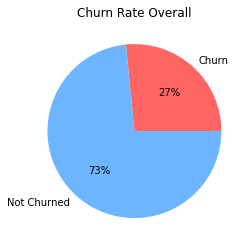

In [4]:
# get pie chart churn
pm.get_pie_churn(train)

- About 27% of customers in the training data will churn

## Is tenure significantly different in customers who have churned than customers who have not churned?

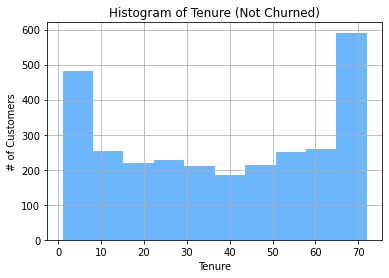

In [5]:
# get histogram chart for tenure, no churn
pm.get_hist_tenure_no_churn(train)

- There is a variety of ongoing tenures in customers currently with Telco. Especially high retention of customers with tenure greater than 65.

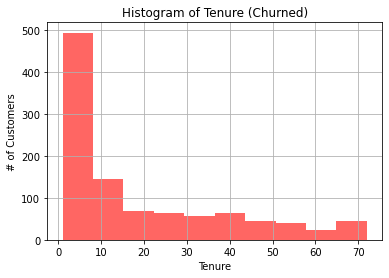

In [6]:
# get histogram chart for tenure, churn
pm.get_hist_tenure_churn(train)

- Customers who have churned appear to have a low tenure.

#### I will use an independent t-test between two sample groups to determine if 'Tenure' and 'Churn' are related.

>One group will contain the tenure of customers who have not churned.

>The second group will contain the tenure of customers who have churned.

>I will use a confidence interval of 95% with alpha set to .05

#### Ho: 'Tenure' of 'Churned' and 'Not Churned' customers are the same.
#### Ha: 'Tenure' of 'Churned' and 'Not Churned' customers are significantly differrent.

In [7]:
# get ttest
e.get_ind_ttest_tenure(train)

t     = 25.7700
p     = 0.0000


### The p-value is lower than our alpha, giving us the evidence to support that a relationship exists between 'Tenure' and 'Churn'. With our null hypothesis rejected, and the signifcant difference in tenure between customers who have churned and customers who have not churned, I believe that using the 'Tenure' feature will have a significant positive impact on the model's accuracy.

## Does a customer having a partner affect churn?

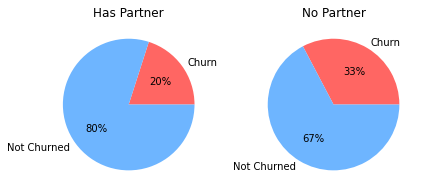

In [8]:
# get pie charts
pm.get_pie_part(train)

- Churn rate is 13% higher in customers who do not have a partner.

#### I will now use a chi-square test to determine if 'Partner' and 'Churn' are related.

>I will use a confidence interval of 95% with alpha set to .05

#### Ho: 'Partner' and 'Churn' are independent of each other.

#### Ha: 'Partner' and 'Churn' are related.

In [9]:
# get chi2
e.get_chi2_part(train)

chi^2 = 80.0893
p     = 0.0000


### The p-value is lower than our alpha, giving us the evidence to support that a relationship exists between 'Partner' and 'Churn'. With our null hypothesis rejected, and the 13% difference in churn observed in the train data, I believe that using 'Partner' in modeling will likely have a significant positive impact on the model's accuracy.

## Does a customer having dependents play a role in churn?

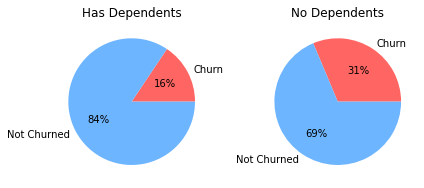

In [10]:
# get pie charts
pm.get_pie_dep(train)

- Churn percentage is 15% higher in customers who do not have dependents.

#### I will now use a chi-square test to determine if 'Dependents' and 'Churn' are related.

>I will use a confidence interval of 95% with alpha set to .05

#### Ho: 'Dependents' and 'Churn' are independent of each other.

#### Ha: 'Dependents' and 'Churn' are related.

In [11]:
# get chi2
e.get_chi2_dep(train)

chi^2 = 104.5425
p     = 0.0000


### The p-value is lower than our alpha, giving us the evidence to support that a relationship exists between 'Dependents' and 'Churn'. With our null hypothesis rejected, and the 15% difference in churn observed in the train data, I believe that using 'Dependents' in modeling will likely have a significant positive impact on the model's accuracy.

## Is a customer's senior citizen status related to churn?

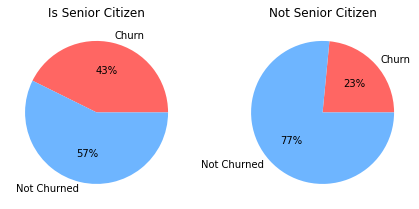

In [12]:
# get pie charts
pm.get_pie_sen(train)

- Churn percentage is 20% higher in customers who are senior citizens.

#### I will now use a chi-square test to determine if 'Senior Citizen' and 'Churn' are related.

>I will use a confidence interval of 95% with alpha set to .05

#### Ho: 'Senior Citizen' and 'Churn' are independent of each other.

#### Ha: 'Senior Citizen' and 'Churn' are related.

In [13]:
# get chi2
e.get_chi2_sen(train)

chi^2 = 99.7192
p     = 0.0000


### The p-value is lower than our alpha, giving us the evidence to support that a relationship exists between 'Senior Citizen' and 'Churn'. With our null hypothesis rejected, and the 20% difference in churn observed in the train data, I believe that using 'Senior Citizen' in modeling will likely have a significant positive impact on the model's accuracy.

## Does a customer having internet service affect churn?

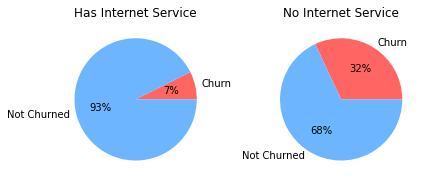

In [14]:
# get pie charts
pm.get_pie_int(train)

- There is a 25% higher churn rate in customers who do not have internet service with Telco.

#### I will now use a chi-square test to determine if 'Internet Service' and 'Churn' are related.

>I will use a confidence interval of 95% with alpha set to .05

#### Ho: 'Internet Service' and 'Churn' are independent of each other.

#### Ha: 'Internet Service' and 'Churn' are related.

In [15]:
# get chi2
e.get_chi2_int(train)

chi^2 = 208.5365
p     = 0.0000


### The p-value is lower than our alpha, giving us the evidence to support that a relationship exists between 'Internet Service' and 'Churn'. With our null hypothesis rejected, and the 25% difference in churn observed in the train data, I believe that using 'Internet Service' in modeling will likely have a significant positive impact on the model's accuracy.

## Does a customer having multiple lines with phone service affect churn?

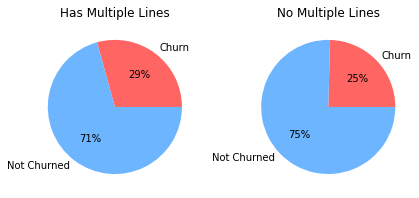

In [16]:
# get pie charts
pm.get_pie_mult(train)

- There is a 4% higher churn rate in customers who have multiple lines.

#### I will now use a chi-square test to determine if 'Internet Service' and 'Churn' are related.

>I will use a confidence interval of 95% with alpha set to .05

In [17]:
# get chi2
e.get_chi2_mult(train)

chi^2 = 10.8303
p     = 0.0010


### The p-value is lower than our alpha, giving us the evidence to support that a relationship exists between 'Multiple Lines' and 'Churn'. With our null hypothesis rejected, and the 4% difference in churn observed in the train data, I believe that using 'Multiple Lines' in modeling will likely have a small positive impact on the model's accuracy.

## Exploration Summary

- 'Multiple Lines' was found to be a driver of 'Churn' but is likely a weak influence.


- 'Tenure' was found to be a driver of 'Churn', significant differences in tenure between churn and non-churn sample groups were found.


- 'Partner' was found to be a driver of 'Churn'


- 'Dependents' was found to be a driver of 'Churn'


- 'Senior Citizen' was found to be a driver of 'Churn'


- 'Internet Service' was found to be a driver of 'Churn'

## Features To Move Forward With

- 'Multiple Lines' (small percentage difference in churn, but statistically significant)


- 'Tenure' (large difference in tenure between sample groups)


- 'Partner' (significant percentage difference in churn and statistical relationship found)


- 'Dependents' (significant percentage difference in churn and statistical relationship found)


- 'Senior Citizen' (significant percentage difference in churn and statistical relationship found)


- 'Internet Service' (significant percentage difference in churn and statistical relationship found)

## Modeling

- I will use accuracy as my evaluation metric


- Non-churned customers makeup 73% of the data


- By assuming no churn for every customer, there is an accuracy of 73%


- 73% will be the baseline accuracy I use for this project


- I will be evalutating models developed using four different model types and varying hyperparameter configurations


- Models will be evaluated on train and validate data


- Model that performs best will move on to be evaluated against the test data set

In [18]:
# prep data for modeling
train_x, validate_x, test_x, train_y, validate_y, test_y = pm.model_prep(train, validate, test)

## Decision Tree

In [19]:
# get decision tree results
pm.get_tree(train_x, validate_x, train_y, validate_y)

Accuracy of Decision Tree on train data is 0.7914655829311659
Accuracy of Decision Tree on validate data is 0.764218009478673


- Decision Tree validate accuracy is 3% higher than baseline, a good start

## Random Forest

In [20]:
# get rf results
pm.get_rf(train_x, validate_x, train_y, validate_y)

Accuracy of Random Forest on train data is 0.7914655829311659
Accuracy of Random Forest on validate data is 0.7707345971563981


- Random Forest validate accuracy is 4% higher than baseline

## Logistic Regression

In [21]:
# get logistic regression results
pm.get_reg(train_x, validate_x, train_y, validate_y)

Accuracy of Logistic Regression on train is 0.7858775717551435
Accuracy of Logistic Regression on validate is 0.7636255924170616


- Logistic Regression validate accuracy is 3% higher than baseline

## KNN

In [22]:
# get knn results
pm.get_knn(train_x, validate_x, train_y, validate_y)

Accuracy of KNN on train is 0.8051816103632208
Accuracy of KNN on validate is 0.7511848341232228


- KNN validate accuracy is 2% higher than baseline

## Comparing Models

- All models performed better than baseline on train and validate.

- All models are good choices for test, but we must go with the model that performed the best overall, which is Random Forest.

- Random Forest performed best with 77% accuracy, 4% higher than baseline.

## Random Forest on Test

In [23]:
# get test results for final model
pm.get_rf_test(train_x, test_x, train_y, test_y)

Accuracy of Random Forest on train data is 0.7914655829311659
Accuracy of Random Forest on test data is 0.7924662402274343


## Modeling Summary

- All models performed better than baseline on train and validate.

- Random Forest was the model with the highest accuracy and was selected test evaluation.

- Random Forest delivered an accuracy of 79% on both train and test data, 6% above baseline.

# Conclusions

### Exploration

- No churn in customers occurs about 73% of the time


- Customers who did not have dependents have a higher chance of churning


- Customers who are senior citizens have a higher chance of churning


- Customers without a partner have a higher chance of churning


- Customers without internet service have a higher chance of churning


- Customers with multiple lines and phone service have a slightly higher chance of churning


- Tenure is significantly different between customers who churned and customer who did not churn

### Modeling

#### The final model significantly outperformed the baseline.
- Model performs 6% higher than baseline predictions.
#### Possible reason for this:

- 'Dependents', 'Partner', 'Senior Citizen', 'Internet Service', and 'Tenure' are significant drivers of churn.


- 'Multiple Lines' has a smaller influence to final model accuracy but was included as it led to a slightly higher accuracy in validate evaluations.

## Recommendations

- Possible limited time discounts to customers who are likely to churn within the featured demographics such as senior citizens and customers who are without a partner or dependents.


- Incentivize using Telco's internet service.

## Next steps

- Investigate the services that customers who churned are using to further identify other drivers of churn.